In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize#Se cargan todas las librerías que vamos a usar

import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



## 1. Lectura de datos

In [2]:
data = pd.read_csv('sentiment_tweets3.csv')
dataset = data[['message to examine']]
dataset

,message to examine
0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...
10309,No Depression by G Herbo is my mood from now o...
10310,What do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...
10312,dont mistake a bad day with depression! everyo...


## 2.  Limpieza del contenido de tweets

In [3]:

def limpiar_texto(data):

    for index, row in data.iterrows(): 
        #print(row)
        message = row['message to examine']
        #print(message)
        new_line = re.sub(r'Ã|Â|[^\x20-\x7E]|ì|ë|°|ï|½|<Emoji:\s*[^>]+>|https?://\S+|www\.\S+|\b\S+\.com\S+\b|[@#]\w+|@|¦|¢',"", message)
        #print(new_line)
        new2 = new_line.lower()
        tokenizer = TweetTokenizer()
        sep = tokenizer.tokenize(new2)
        #print(sep)
        stopW = set(stopwords.words('english'))
        #print(stopW)
        
        for lista in sep:
            filtered_sentence = [word for word in sep if not word in stopW]
            #print(filtered_sentence)
            
#        filtered_sentence = []
#        for word in sep:
#            if word not in stopW:
#                filtered_sentence.append(word)

            lemat = SnowballStemmer('english')
            stems = [lemat.stem(word) for word in filtered_sentence]
        #print(stems)
        final_text = ' '.join(stems)
        #print(final_text)
        #data[message] == final_text 
        data.at[index, 'message to examine'] = final_text
    #print(len(data))
        
    return data

In [4]:
limpiar_texto(dataset)


,message to examine
0,"real good moment . missssssssss much ,"
1,read manga
2,-
3,"need send ' em account tomorrow . odd , even r..."
4,add myspac ! ! !
...,...
10309,"depress g herbo mood , i'm done stress peopl d..."
10310,depress succumb brain make feel like never eno...
10311,"ketamin nasal spray show promis depress , suicid"
10312,dont mistak bad day depress ! everyon ' em !


In [5]:
dataset[0:5]

,message to examine
0,"real good moment . missssssssss much ,"
1,read manga
2,-
3,"need send ' em account tomorrow . odd , even r..."
4,add myspac ! ! !


## 3.  Identificación del sentimiento 

In [6]:
from textblob import TextBlob
def clasificador(data):
    labels = []
    for index, row in data.iterrows(): 
        message = row['message to examine']
        text = TextBlob(message)
        sentiment_polarity = text.sentiment.polarity
        #print(sentiment_polarity, text)
        
        if -1 <= sentiment_polarity <= -0.8:
            label = "Hater"
        elif -0.8 < sentiment_polarity < 0:
            label = "Molesto"
        elif sentiment_polarity == 0:
            label = "Neutro"
        elif 0 < sentiment_polarity < 0.8:
            label = "Contento"
        elif 0.8 <= sentiment_polarity <= 1:
            label= "Muy feliz"
        labels.append(label)
        
#        print(line, text, sentiment_polarity, label)
#    print(labels)
#    print(len(labels))
#    print(len(data),len(labels))
#    print(data[0:5])
    data['label'] = labels
#    data.insert(loc=1, column='label', value=labels)
    
#    print(data)
    return data


In [7]:
clasificador(dataset)

C:\Users\lucia\AppData\Local\Temp\ipykernel_16988\2259067432.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = labels


,message to examine,label
0,"real good moment . missssssssss much ,",Contento
1,read manga,Neutro
2,-,Neutro
3,"need send ' em account tomorrow . odd , even r...",Molesto
4,add myspac ! ! !,Neutro
...,...,...
10309,"depress g herbo mood , i'm done stress peopl d...",Molesto
10310,depress succumb brain make feel like never eno...,Molesto
10311,"ketamin nasal spray show promis depress , suicid",Molesto
10312,dont mistak bad day depress ! everyon ' em !,Molesto


In [8]:
dataset[0:5]

,message to examine,label
0,"real good moment . missssssssss much ,",Contento
1,read manga,Neutro
2,-,Neutro
3,"need send ' em account tomorrow . odd , even r...",Molesto
4,add myspac ! ! !,Neutro


## 4. Codificación de los atributos y objetivos

In [63]:
atributos = dataset["message to examine"]
#Vectorización del texto del atributo con el codificador CountVectorizer
vectorizer = CountVectorizer()
#Conversión de los atributos en valores numéricos
atributos = vectorizer.fit_transform(atributos)
#print(atributos)
objetivo = dataset["label"]

(atributos_entrenamiento, atributos_prueba, objetivo_entrenamiento, objetivo_prueba) = train_test_split(atributos, objetivo,
                                                                                                        random_state=12345,
                                                                                                        test_size=.2,
                                                                                                        stratify=objetivo)


## 5. Entrenamiento del modelo

#### A través del algoritmo Naive Bayes

In [64]:
#Entrenamiento del modelo de Naive Bayes usando la instancia MultinomialNB
sentiment_detector = MultinomialNB(alpha=1.0)  # alpha es el parámetro de suavizado
sentiment_detector.fit(atributos_entrenamiento, objetivo_entrenamiento)

#Predicciones con el conjunto de prueba
predicciones = sentiment_detector.predict(atributos_prueba)
#Cálculo de la precisión del modelo
precision = sentiment_detector.score(atributos_prueba, objetivo_prueba)
print("La precisión del modelo desarrollado es", precision*100)


La precisión del modelo desarrollado es 72.07949587978672


#### A través del algoritmo Regresión Logística

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score

scaler = StandardScaler(with_mean=False, with_std=True)
atributos_entrenamiento = scaler.fit_transform(atributos_entrenamiento)
atributos_prueba = scaler.transform(atributos_prueba)

model = LogisticRegression(max_iter=1000)
model.fit(atributos_entrenamiento, objetivo_entrenamiento)

objetivo_predict = model.predict(atributos_prueba)
precision = precision_score(objetivo_prueba, objetivo_predict, average='weighted')
print("La precisión del modelo desarrollado es", precision*100)


La precisión del modelo desarrollado es 81.20628842373155


## 6. Uso del modelo entrenado


In [40]:
tweets = pd.read_excel('my_tweets.xlsx')
tweets

,message to examine
0,hating on me is still being obsessed with me
1,whatever you say man with big autistic eyes
2,first time getting a setlist at a concert toni...
3,wuthering heights to MOTHERing nights
4,this looks like a yearbook for a school where ...
...,...
56,Haaaa!! Love it!!! #ThatsMyJam
57,You know what I’d wish for if I had a genie? H...
58,I don’t have time to cook a recipe that takes ...
59,My man. Crushed it @MrCraigRobinson . #ThatsMyJam


In [41]:
limpiar_texto(tweets)
clasificador(tweets)

,message to examine,label
0,hate still obsess,Hater
1,whatev say man big autist eye,Neutro
2,first time get setlist concert tonight big day,Contento
3,wuther height mother night,Neutro
4,look like yearbook school student kafka,Neutro
...,...,...
56,haaaa ! ! love ! ! !,Muy feliz
57,know id wish geni ? happi birthday paul rudd t...,Neutro
58,"dont time cook recip take hour , time watch 3 ...",Neutro
59,man . crush .,Neutro


#### Representación de tweets "hater"


In [52]:
hater = tweets[:30]
#print(hater)

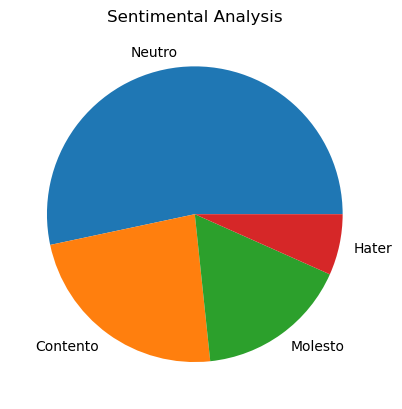

In [61]:
import matplotlib.pyplot as plt

values_hater = hater.value_counts('label')
#print(valores)
labels_hater=values_hater.index
#print(labels)
plt.pie(values_hater, labels= labels_hater)
plt.title("Sentimental Analysis")
plt.show()

#### Representación de tweets "positivos"

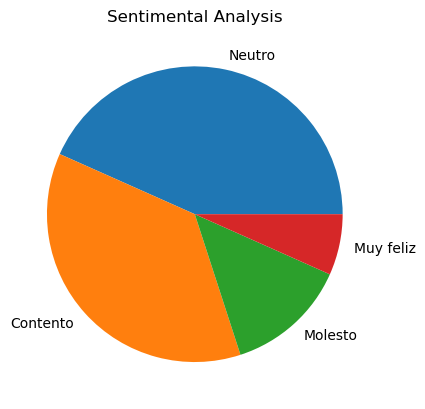

In [62]:
happy = tweets[31:]
#print(happy)
values_happy = happy.value_counts('label')
#print(valores)
labels_happy=values_happy.index
#print(labels)
plt.pie(values_happy, labels= labels_happy)
plt.title("Sentimental Analysis")
plt.show()